In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv(r"C:\Users\Asad shaikh\Documents\mushroom.csv")


In [5]:
# Exploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.nunique())


   cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0          4            2          7        0     1                1   
1          4            0          6        0     1                3   
2          3            1          5        1     4                1   
3          0            2          4        1     3                3   
4          3            3          8        1     5                2   

   gill_spacing  gill_size  gill_color  stalk_shape  ...  veil_type  \
0             2          0           7            1  ...          0   
1             1          1           3            0  ...          1   
2             1          0           8            1  ...          1   
3             0          0           6            0  ...          0   
4             1          1           6            0  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3   

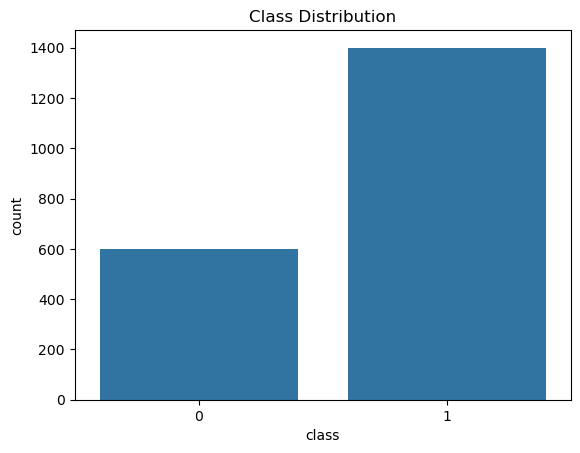

In [6]:
# Visualizing class distribution
sns.countplot(x=df['class'])
plt.title("Class Distribution")
plt.show()

In [7]:
# Encoding categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Splitting dataset into features and target
X = df.drop(columns=["class"])
y = df["class"]

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Implementing SVM with default parameters
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Hyperparameter tuning with different kernels
kernels = ["linear", "poly", "rbf"]
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[kernel] = accuracy_score(y_test, y_pred)



Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400

Confusion Matrix:
 [[  0 120]
 [  0 280]]


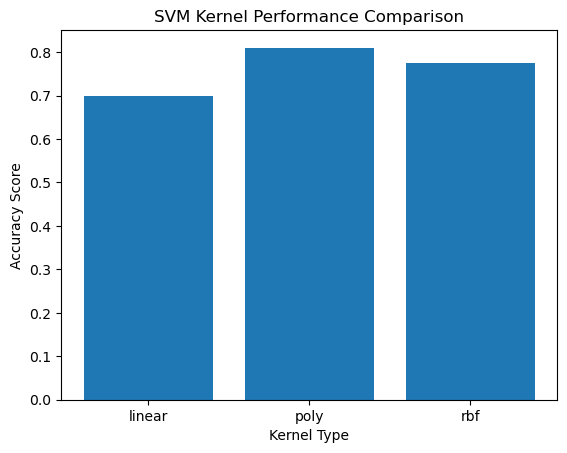

Final Results: {'linear': 0.7, 'poly': 0.81, 'rbf': 0.775}


In [9]:
# Visualizing performance comparison
plt.bar(results.keys(), results.values())
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy Score")
plt.title("SVM Kernel Performance Comparison")
plt.show()

print("Final Results:", results)